In [12]:
import os
import pathlib
from PIL import Image
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
from keras.src.layers import RandomTranslation

from models.layers import RandomRotation


def load_data(data_path: str) -> Tuple[List[np.array], List[int]]:
    def lbl_mapping(s: str) -> int:
        if s.startswith('NORMAL'):
            return 0
        elif s.startswith('VIRUS') or s.startswith('BACTERIA'):
            return 1
        else:
            raise ValueError(f'invalid string {s}')

    def lbl(i: Image) -> int:
        return lbl_mapping(os.path.basename(i.filename))

    def to_tensor(i: Image):
        return np.asarray(i, dtype=np.uint8).reshape((224,224,1))

    data_dir = pathlib.Path(os.path.join(data_path, 'train'))
    xs = []
    ys = []
    for i in data_dir.glob('**/*.jpeg'):
        i = Image.open(i)
        ys.append(lbl(i))
        i = i.resize((224,224))
        xs.append(to_tensor(i))
    return (xs, ys)


def visualize(original, augmented):
    original = np.array(original)
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original, cmap='gray')

    augmented = np.array(augmented)
    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augmented, cmap='gray')

In [13]:
(x, y) = load_data('data/chest_xray')

In [14]:
i = x[0]

In [15]:
i.shape

(224, 224, 1)

In [17]:
from keras.layers import RandomRotation, RandomTranslation

rr = RandomRotation(0.26)
tr = RandomTranslation()

In [18]:
from utils.images import visualize
import numpy as np
batch = x[0:20]
# translated = tr(batch)
rotated = rr(batch)
# bright = br(batch)

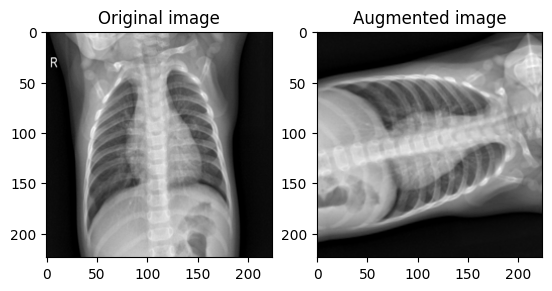

In [21]:
from scipy import ndimage
visualize(batch[2], rotated[2])

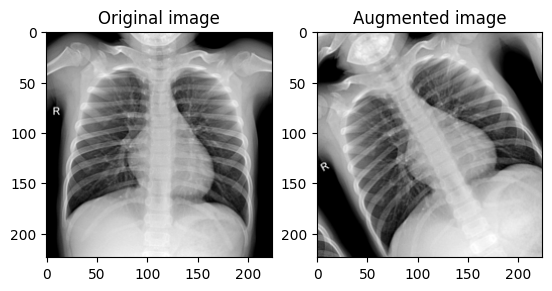

In [12]:
from PIL import Image
from scipy import ndimage

i = Image.open('data/chest_xray/train/NORMAL/NORMAL-28501-0001.jpeg')
i = i.resize((224, 224))
i = np.asarray(i, dtype=np.uint8)
visualize(i, ndimage.rotate(i, 30, mode='reflect', reshape=False))